In [1]:
import wandb

api = wandb.Api(timeout=19)
sweep = api.sweep('carla-pedestrians/sensitivity/sweeps/j7yihb85')

In [2]:
from pedestrians_scenarios.karma.pose.skeleton import CARLA_SKELETON
import pandas as pd

columns = pd.MultiIndex.from_tuples([('missing_joint_probabilities', k) for k in CARLA_SKELETON.__members__.keys()] + [('F1Score', 'summary'), ('F1Score', 'max')])

In [3]:
import os

if not os.path.exists('sensitivity_analysis.csv'):
    rows = []

    for run in sweep.runs:
        try:
            row = list(run.config['missing_joint_probabilities']) + [run.summary['hp/F1Score'], run.history()['hp/F1Score'].max()]
            rows.append(row)
        except:
            pass

    df = pd.DataFrame(rows, columns=columns)
    df.to_csv('sensitivity_analysis.csv')
else:
    df = pd.read_csv('sensitivity_analysis.csv', skiprows=2, names=columns)

In [4]:
df.head(10)

missing_joint_probabilities                                          \
                     crl_root crl_hips__C crl_spine__C crl_spine01__C   
0                           0           1            0              1   
1                           0           1            0              1   
2                           1           1            1              1   
3                           0           1            1              1   
4                           1           1            0              1   
5                           0           1            1              0   
6                           1           1            1              1   
7                           1           1            1              1   
8                           1           1            1              1   
9                           1           1            1              1   

                                                                     \
  crl_shoulder__L crl_arm__L crl_foreArm__L crl_hand__L crl_neck__C   
0               1          1              0           0           1   
1               0          0              0           1           1   
2               1          1              1           1           1   
3               1          0              0           1           1   
4               1          1              0           1           1   
5               0          1              1           0           1   
6               1          0              1           0           0   
7               1          0              1           1           1   
8               1          0              1           1           1   
9               1          0              0           1           1   

               ...                                                    \
  crl_Head__C  ... crl_foot__R crl_toe__R crl_toeEnd__R crl_thigh__L   
0           0  ...           1          1             1            1   
1           0  ...           0          1             0            1   
2           1  ...           0          1             1            1   
3           1  ...           1          1             1            1   
4           0  ...           1          0             0            1   
5           0  ...           1          1             1            1   
6           1  ...           0          1             1            1   
7           0  ...           1          1             1            0   
8           1  ...           1          1             0            0   
9           0  ...           1          1             0            0   

                                                    F1Score            
  crl_leg__L crl_foot__L crl_toe__L crl_toeEnd__L   summary       max  
0          1           1          1             0  0.797449  0.814322  
1          0           0          1             0  0.849567  0.858191  
2          0           1          1             1  0.751093  0.752303  
3          1           1          1             1  0.836981  0.839198  
4          1           1          0             1  0.849117  0.834394  
5          1           0          1             1  0.863285  0.779816  
6          1           1          1             1  0.830619  0.805755  
7          0           1          0             1  0.851706  0.835964  
8          0           1          0             0  0.843086  0.816020  
9          1           1          1             0  0.838858  0.849833  

[10 rows x 28 columns]

In [21]:
df.mean().sort_values(ascending=False)

F1Score                      max                0.837434
                             summary            0.831039
missing_joint_probabilities  crl_spine__C       0.796729
                             crl_foot__R        0.789720
                             crl_hips__C        0.765187
                             crl_arm__L         0.748832
                             crl_foot__L        0.733645
                             crl_leg__L         0.720794
                             crl_neck__C        0.719626
                             crl_spine01__C     0.716121
                             crl_foreArm__R     0.684579
                             crl_thigh__R       0.682243
                             crl_thigh__L       0.674065
                             crl_root           0.658879
                             crl_toe__L         0.653037
                             crl_toeEnd__R      0.643692
                             crl_leg__R         0.633178
                             cr

In [79]:
a = [item[1] for item in df.columns.values[:26]]
a


['crl_root',
 'crl_hips__C',
 'crl_spine__C',
 'crl_spine01__C',
 'crl_shoulder__L',
 'crl_arm__L',
 'crl_foreArm__L',
 'crl_hand__L',
 'crl_neck__C',
 'crl_Head__C',
 'crl_eye__L',
 'crl_eye__R',
 'crl_shoulder__R',
 'crl_arm__R',
 'crl_foreArm__R',
 'crl_hand__R',
 'crl_thigh__R',
 'crl_leg__R',
 'crl_foot__R',
 'crl_toe__R',
 'crl_toeEnd__R',
 'crl_thigh__L',
 'crl_leg__L',
 'crl_foot__L',
 'crl_toe__L',
 'crl_toeEnd__L']

In [89]:
X = df.iloc[:, :26]
y = df.iloc[:, 26]

In [90]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# feature_importance = pd.DataFrame({'feature': a, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)
# plot feature importance
# feature_importance.head(2)
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

/home/plgwielgosz/miniconda3/envs/video2carla/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [91]:
feature_importance = pd.DataFrame({'feature': a, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

<AxesSubplot:ylabel='feature'>

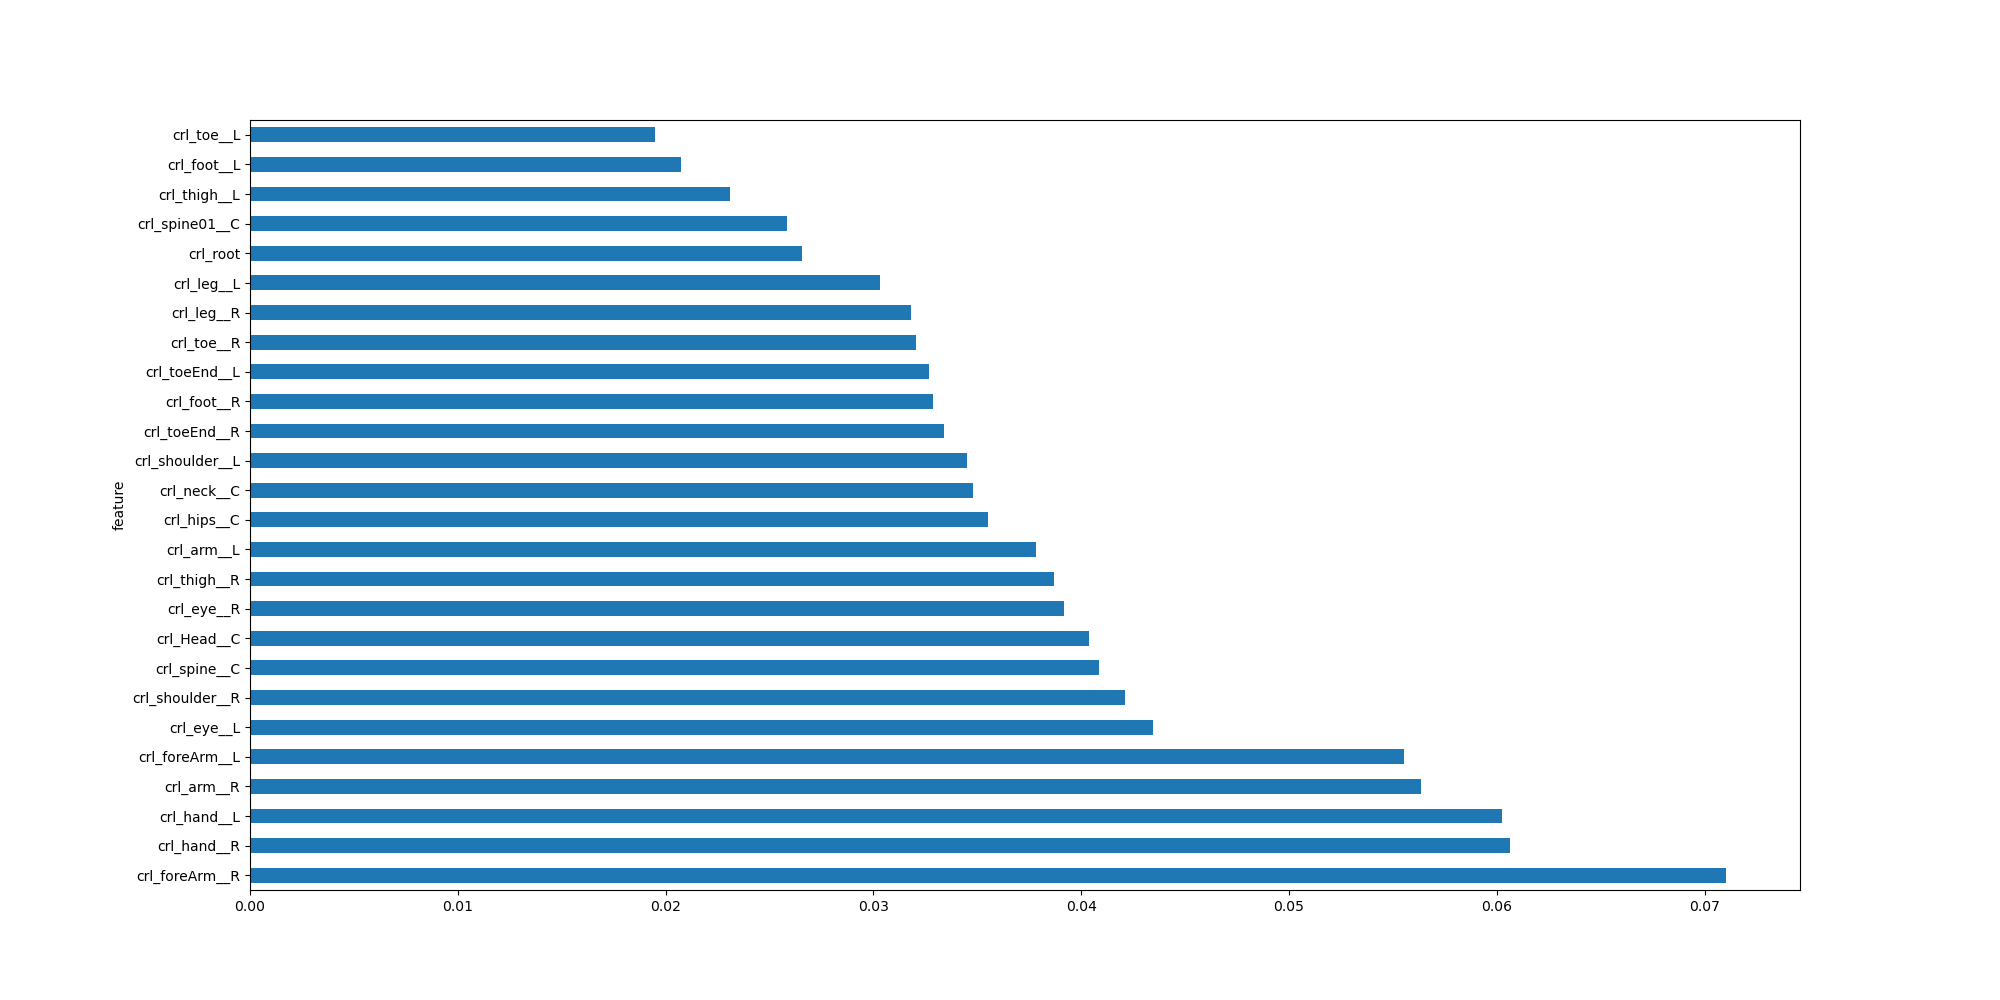

In [84]:
feature_importance.plot.barh(x='feature', y='importance', figsize=(20, 10), legend=False)

/home/plgwielgosz/miniconda3/envs/video2carla/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:ylabel='feature'>

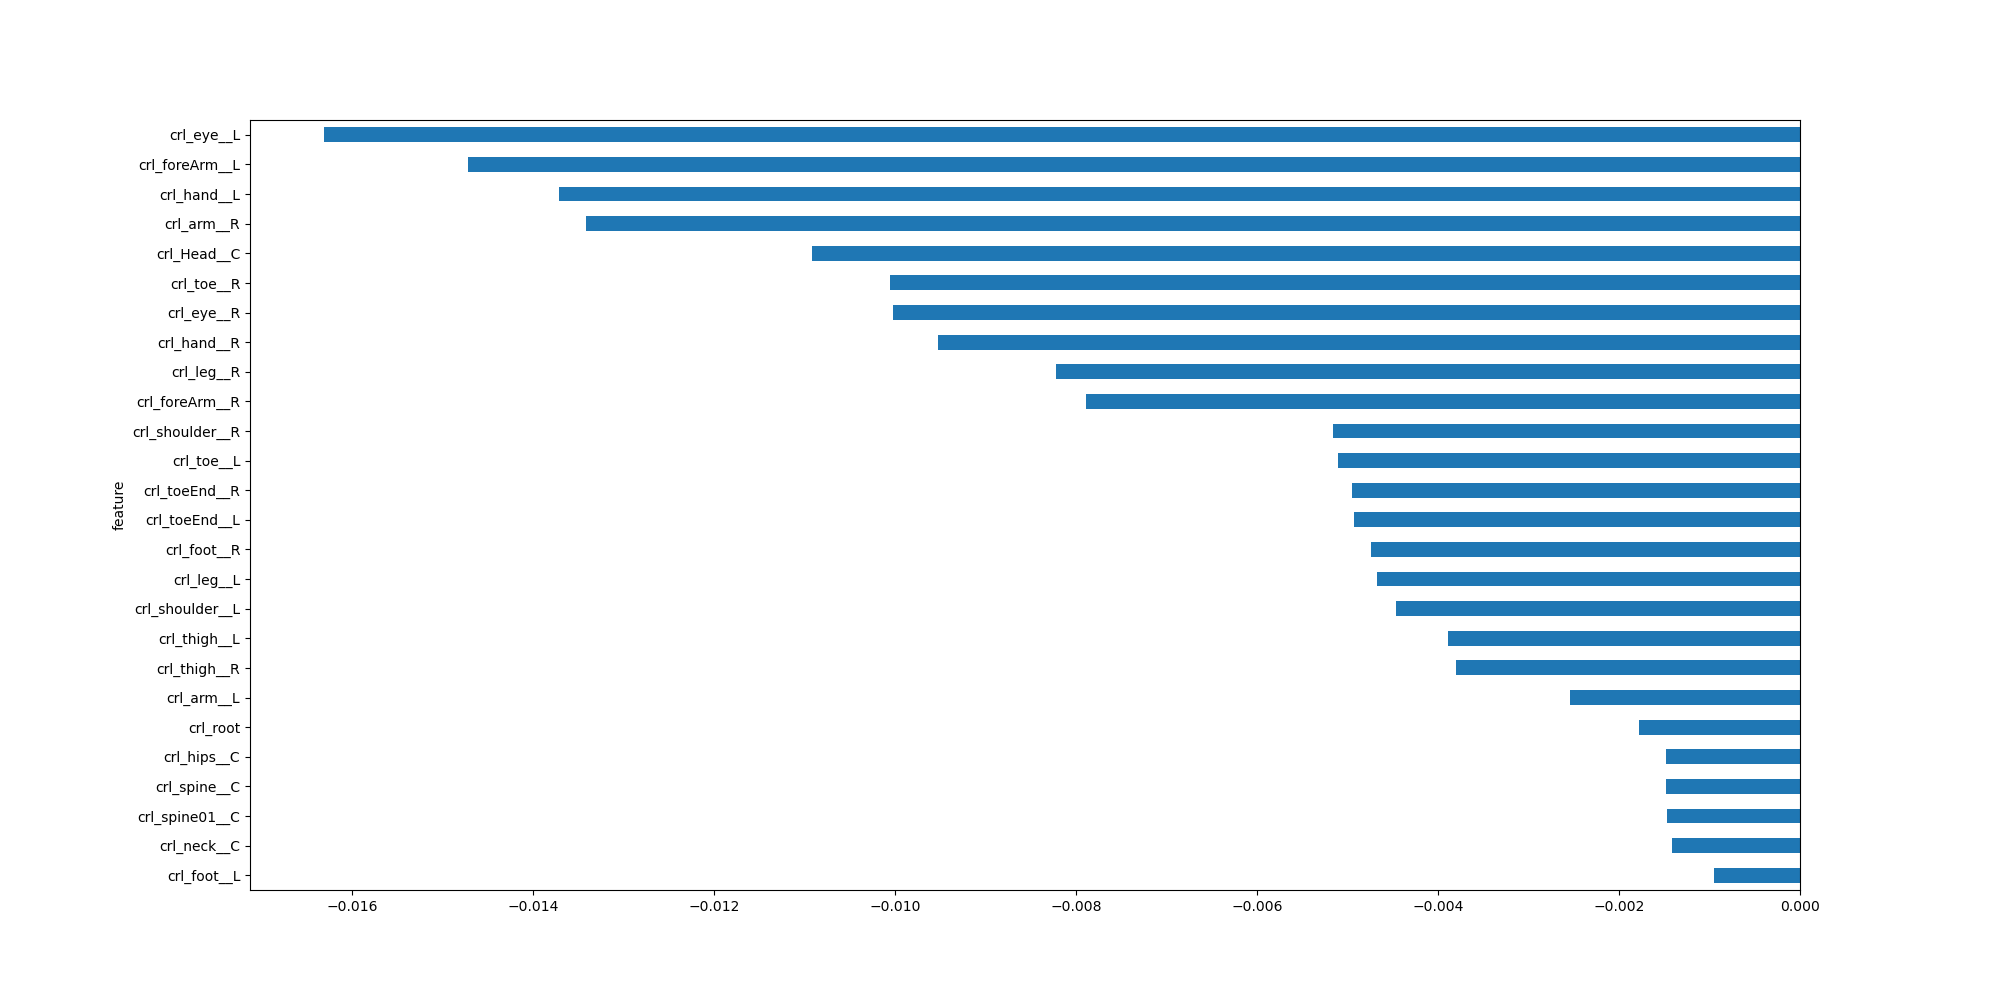

In [93]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model=LinearRegression()

model.fit(X,y)
# importance=model.coef_
# importance=np.sort(importance)
#plotting the features and their score in ascending order
feature_importance_lr = pd.DataFrame({'feature': a, 'importance': model.coef_}).sort_values('importance', ascending=False)

feature_importance_lr.plot.barh(x='feature', y='importance', figsize=(20, 10), legend=False)

In [5]:
import numpy as np

joints = df.values[:, :-2]
f1score = df.values[:, -2:].max(axis=1).reshape(-1, 1)

X = np.concatenate((joints, f1score), axis=1)


In [6]:
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

params = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params["n_neighbors"], include_self=False
)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
ward = cluster.AgglomerativeClustering(
    n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
)
spectral = cluster.SpectralClustering(
    n_clusters=params["n_clusters"],
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
dbscan = cluster.DBSCAN(eps=params["eps"])
optics = cluster.OPTICS(
    min_samples=params["min_samples"],
    xi=params["xi"],
    min_cluster_size=params["min_cluster_size"],
)
affinity_propagation = cluster.AffinityPropagation(
    damping=params["damping"], preference=params["preference"], random_state=0
)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average",
    affinity="cityblock",
    n_clusters=params["n_clusters"],
    connectivity=connectivity,
)
birch = cluster.Birch(n_clusters=params["n_clusters"])
gmm = mixture.GaussianMixture(
    n_components=params["n_clusters"], covariance_type="full"
)

clustering_algorithms = (
    ("MiniBatch\nKMeans", two_means),
    ("Affinity\nPropagation", affinity_propagation),
    ("MeanShift", ms),
    ("Spectral\nClustering", spectral),
    ("Ward", ward),
    ("Agglomerative\nClustering", average_linkage),
    ("DBSCAN", dbscan),
    ("OPTICS", optics),
    ("BIRCH", birch),
    ("Gaussian\nMixture", gmm),
)

In [7]:
%matplotlib widget

from itertools import cycle, islice
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt

# plt.subplots_adjust(
#     left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.5
# )

plot_num = 1
for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the "
            + "connectivity matrix is [0-9]{1,2}"
            + " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding"
            + " may not work as expected.",
            category=UserWarning,
        )
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        labels = algorithm.labels_.astype(int)
    else:
        labels = algorithm.predict(X)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(labels) + 1),
            )
        )
    )
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    # plt.subplot(4, 3, plot_num)
    # plt.title(name, size=10)
    # plt.scatter(X[:, 0], X[:, -1], s=10, color=colors[labels])

    # plt.xlim(-0.5, 1.5)
    # plt.ylim(0, 1.5)
    # plt.xticks(())
    # plt.yticks(())
    
    plot_num += 1

# plt.show()